# IN THE NAME OF GOD

Questions:
   
       1) number of miss values in dataset
       2) count duplicate rows and remove them
       3) average blood pressure,  heart rate, mean age,  highest cholestrol
       4) create X, y from dataset
       5) LabelEncoder of ys
       6) Standardization of Xs (then compare with MinMaxScaler and RobustScaler)
       7) split to train and test
       8) use these models: Logistic, KNN, SVM, DecisionTree and RandomForest
       9) plot their accuracyes

In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.head(7)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [2]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
# drop duplicated
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(303, 14)
(302, 14)


In [10]:
# average blood pressure =,  heart rate, mean age,  highest cholestrol
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [11]:
# 4) create X, y from dataset

X = df.drop('output', axis=1)
y = df['output']

In [12]:
# 5) LabelEncoder of ys
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
# 6) Standardization of Xs
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS.fit(X)
X = SS.transform(X)

In [14]:
# 7) split to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

temp_info = [X_train, X_test, y_train, y_test]
for i in temp_info:
    print(i.shape)

(226, 13)
(76, 13)
(226,)
(76,)


In [16]:
# 8) use these models: Logistic, KNN, SVM, DecisionTree and RandomForest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

models = [LogisticRegression(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]

accs = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accs.append(acc)
    print(acc)
        

0.8157894736842105
0.8157894736842105
0.7894736842105263
0.7631578947368421
0.7631578947368421


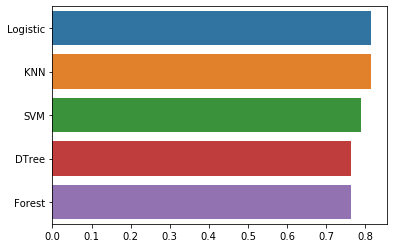

In [18]:
import seaborn as sns
sns.barplot(x= accs, y=['Logistic','KNN', 'SVM', 'DTree', 'Forest'])

# USE MinMaxScaler

(226, 13)
(76, 13)
(226,)
(76,)
0.8026315789473685
0.7894736842105263
0.7631578947368421
0.7368421052631579
0.7763157894736842


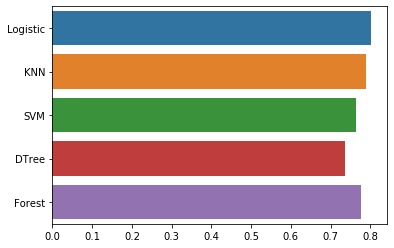

In [19]:
X = df.drop('output', axis=1)
y = df['output']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.preprocessing import MinMaxScaler

SS = MinMaxScaler()
SS.fit(X)
X = SS.transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

temp_info = [X_train, X_test, y_train, y_test]
for i in temp_info:
    print(i.shape)
    
accs = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accs.append(acc)
    print(acc)
    
sns.barplot(x= accs, y=['Logistic','KNN', 'SVM', 'DTree', 'Forest'])

# USE RobustScaler

(226, 13)
(76, 13)
(226,)
(76,)
0.8289473684210527
0.8552631578947368
0.8289473684210527
0.7368421052631579
0.7631578947368421


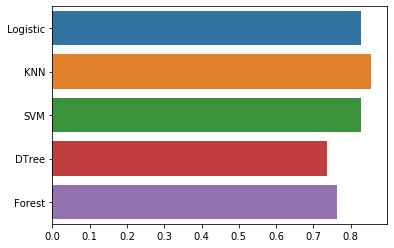

In [20]:
X = df.drop('output', axis=1)
y = df['output']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.preprocessing import RobustScaler

SS = RobustScaler()
SS.fit(X)
X = SS.transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

temp_info = [X_train, X_test, y_train, y_test]
for i in temp_info:
    print(i.shape)
    
accs = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accs.append(acc)
    print(acc)
    
sns.barplot(x= accs, y=['Logistic','KNN', 'SVM', 'DTree', 'Forest'])